In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [2]:
import numpy as np
import scipy.signal
%matplotlib notebook
import matplotlib.pyplot as plt
%autosave 0

# Salida enriquecida

Por defecto la última linea ejecutada en un bloque de código imprime su resultado como string

¿Y si queremos mostrar más que sólo la última linea?

¿Y si queremos mostrar datos que no son interpretables como strings?

Podemos usar las clases y funciones de "salida enriquecida" del modulo [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)



### Función `display`

Esta función puede usarse para pedir explicitamente que un "objeto" sea rendereado 

A diferencia de `print` puede usarse con los demás objetos de `IPython.display`

In [3]:
from IPython.display import display
a = np.array(range(2))
display(a)
b = np.exp(-a**2)
display(-a**2, b)
np.sum(b)

array([0, 1])

array([ 0, -1])

array([1.        , 0.36787944])

1.3678794411714423

### Objeto `Image`

Visualiza una imagen

Las opciones de entrada son

1. Path a una imagen local (PNG, JPG, GIF)
1. URL a una imagen remota
1. Datos crudos de una imagen (bytes)

In [4]:
a = (np.arange(100).reshape(10, 10)*(255./100)).astype('uint8')
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(a); ax.axis('off')
fig.savefig('matrix.JPG')

<IPython.core.display.Javascript object>

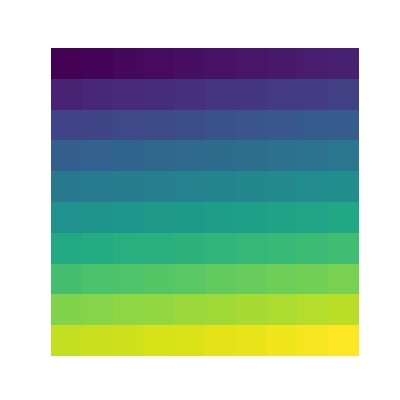

In [5]:
from IPython.display import Image
display(Image(filename="matrix.JPG"))

### Alternativa: [`Pillow`](https://pillow.readthedocs.io/en/stable/)

La librería de manipulación de imágenes `Pillow` es compatible con jupyter y renderea directo con `display`

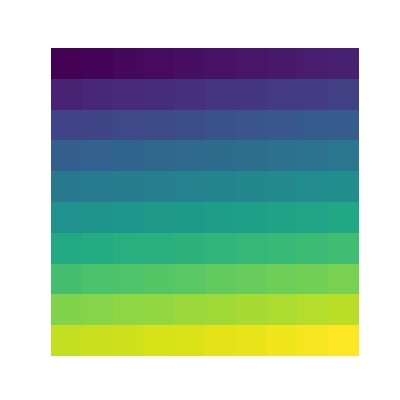

In [6]:
import PIL
img = PIL.Image.open("matrix.JPG")
display(img)

### Objeto `Audio`

Proporciona un reproductor de sonido

Las opciones de entrada son:

1. Path a un archivo (por ejemplo `wav` o `ogg`)
1. URL apuntando un archivo
1. `ndarray` de una dimensión (mono), dos dimensiones (stereo) o más


In [7]:
from IPython.display import Audio

t, dt = np.linspace(0.0, 0.5, num=20000, retstep=True); 
modulacion = np.cos(2.0*np.pi*t*220 + (100/8)*np.sin(2.0*np.pi*t*8))
pajarillo = scipy.signal.chirp(t, f0=5000, f1=3000, t1=t[-1], method='quadratic')

display(Audio(modulacion, rate=1.0/dt),
        Audio(pajarillo, rate=1.0/dt))

###  Objeto `Code`

Muestra código fuente con sintaxis con colores

La entrada puede ser un path o un string 

In [8]:
from IPython.display import Code

display(Code("import foo\nfoo.bar()"),
        Code("script_interesante.py"))

import foo
foo.bar()

def funcion_interesante(n):
    """
    Este script es interesante
    """
    if n == 1:
        return 1

    else:
        return n * funcion_interesante(n-1)

if __name__ == '__main__':
    print(funcion_interesante(10))

### Objeto `HTML`

Renderea código escrito en HTML

La entrada puede ser un archivo local, una URL o un string

In [9]:
from IPython.display import HTML

display(HTML("<p style=\"font-size:200%;text-align:center;font-family:serif;color:red;\">foo</p>"),
        HTML("<table><tr><td>a</td><td>b</td></tr><tr><td>b</td><td>c</td></tr></table"))

a,b
b,c


### Objeto `ProgressBar`

Crea una barra de progreso que puede actualizarse

In [10]:
from IPython.display import ProgressBar
import time

p = ProgressBar(total=100)
p.display()

for i in range(101):
    p.progress = i
    time.sleep(0.01)

[============================================================] 100/100

### Alternativa: [`TQDM`](https://github.com/tqdm/tqdm)

Barra de progreso que además te indica el tiempo por iteración y tiempo estante

Recibe un iterable como entrada

Funciona en notebook (`tqdm_notebook`) y en CLI (`tqdm`)

In [11]:
!pip install tqdm --user

In [12]:
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(100)):
    time.sleep(0.01)

### Objeto `Video`

Crea un reproductor para un archivo, URL o stream de datos crudos (Bytes)

Existen también los objetos `YouTubeVideo` y `VimeoVideo` para embeber videos de estas plataformas

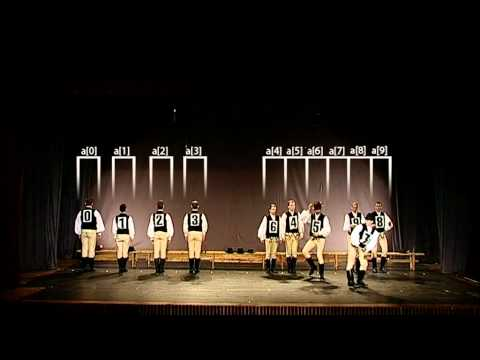

In [13]:
from IPython.display import YouTubeVideo

vid = YouTubeVideo("ywWBy6J5gz8")
display(vid)

# [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/)


### ¿Cómo se instala?
Instalación con `conda`

    conda install -c conda-forge ipywidgets
    
Instalación con `pip`

    pip install ipywidgets --user
    jupyter nbextension enable --py widgetsnbextension
    
### ¿Qué son?
Los objetos de `ipywidgets` son interfaces de control que funcionan en base a eventos. Por ejemplo
- Botones e interruptores
- Deslizadores (*sliders*)
- Listas desplegables (*combo-box*)
- Campos de texto
- Menues y pestañas

Con ellas se pueden crear interfaces gráficas dentro del notebook

### ¿Cómo se ocupan?
Podemos crearlos de forma semi-automática con el **decorador** `interact`

In [14]:
import ipywidgets as widgets

# Se crea un widget por cada argumento de la función
@widgets.interact(x=(0, 10))
def print_cosas(x=0, y=0., z=True, w=['foo','bar'], v='foo'): 
    display(x, y, z)

interactive(children=(IntSlider(value=0, description='x', max=10), FloatSlider(value=0.0, description='y', max…

Para mayor control podemos crearlos manualmente con la **función** `interact` y con los objetos correspondientes

- La lista de objetos [*widget*](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Container/Layout-widgets)
    - Numéricos: `IntSlider`, `FloatSlider`, `IntRangeSlider`, `FloatRangeSlider`, ...
    - Booleanos: `ToggleButton`, `CheckBox`, `Valid`
    - Selección: `Dropdown`, `Select`, `RadioButtons`, `SelectionSlider`, ...
    - Texto: `Text`, `Textarea`, `Label`
    - Contenedores: `HBox`, `VBox`, `Tabs`, `Accordion`
    - Otros: `Image`, `Output`, `Play`, `DatePicker`, `ColorPicker`
    
- El objeto [`Layout`](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html) sirve para dar estilo a los *widgets*


### Ejemplo

- El primer argumento de la función es una tupla y se conecta con un widget `FloatRangeSlider`
- El segundo argumento es fijo, lo definimos usando el atributo `fixed`

In [15]:
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}


def mi_funcion(x, y): # x es la salida del widget, en este caso una tupla
    display(x[0], x[1], y*(x[1] - x[0]))

range_slider = widgets.FloatRangeSlider(min=-100., max=100., step=0.01, 
                                        continuous_update=True, 
                                        description=r'Un argumento muy interesante:',
                                        layout=slider_layout, style=slider_style)
widgets.interact(mi_funcion, x=range_slider, y=widgets.fixed(2));

interactive(children=(FloatRangeSlider(value=(-50.0, 50.0), description='Un argumento muy interesante:', layou…

Los atributos del *widget* creado:

In [16]:
range_slider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

Luego podemos acceder al valor del *widget* usando

In [17]:
range_slider.value

(-50.0, 50.0)

Podemos unir varios *widgets* usando contenedores

In [18]:
insert_name = widgets.Text(description='Escribir tu nombre', style=slider_style)
push_data = widgets.Button(description='Enviar')
# Los contenedores reciben una lista de widgets (se pueden anidar contenedores)
#display(insert_name, push_data)
widgets.HBox([insert_name, push_data])

### Eventos

Podemos usar botones para capturar eventos con el atributo `on_click`

In [19]:
push_data.on_click(lambda x: print(insert_name.value))

Podemos reaccionar ante los cambios de un widget usando el atributo `observe`

Este atributo espera una función con formato específico

In [20]:
sel_slider.keys

NameError: name 'sel_slider' is not defined

In [ ]:
sel_slider.observe?

In [ ]:
def on_change(x):
    print(x)
    # display(change.keys())
    display("Hola {0}, Chao {1}".format(x['new'], x['old']))       

sel_slider = widgets.Dropdown(description="Nombre:", 
                              options=["Pablo", "Sebastián", "Enrique"])

display(sel_slider)
sel_slider.observe(on_change, names='value')

### Output widget

Este widget se puede usar para redireccionar las salidas de otros widgets

In [ ]:
out = widgets.Output(layout={'border': '1px solid black'})
display(out)

In [ ]:
with out:
    display("Hola")

In [ ]:
def on_change(button):
    with out:
        display(insert_name.value)

push_data.on_click(on_change)

### Ejemplo: Galería de gráficas matplotlib

In [ ]:
# Data
Nt, Nf = 1000, 200
time = np.linspace(0, 5, num=Nt).reshape(-1, 1)
freq = 5*np.random.rand(Nf)
phase = np.pi*np.random.randn(Nf)
s = np.sin(2.0*np.pi*time*freq+phase)
# Gráfica
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
idx = 0
line, = ax.plot(time, s[:, idx]); ax.set_title(str(idx))
def plot_features(idx):
    ax.set_title(str(idx))
    line.set_ydata(s[:, idx])
# GUI
prev_button = widgets.Button(description="Anterior")
next_button = widgets.Button(description="Siguiente")

def on_button_clicked(b):
    global idx
    if b.description == "Siguiente":
        if idx < Nt:
            idx += 1
    else:
        if idx > 0:
            idx -= 1
    plot_features(idx)
                
next_button.on_click(on_button_clicked)
prev_button.on_click(on_button_clicked)
display(widgets.HBox([prev_button, next_button]))

In [ ]:
freq = 1.5
time = np.linspace(0, 3/freq, num=500); 
twopift = 2.0*np.pi*freq*time

slider_layout = widgets.Layout(width='600px', height='20px')

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xticks([0, 1/freq, 2/freq, 3/freq]); 
ax.set_xticklabels(["0", r"$1/f_0$", r"$2/f_0$", r"$3/f_0$"]);
line = ax.plot(time, 3*np.cos(twopift))

A = [widgets.FloatSlider(description=r'$A_{0}$'.format(i), min=0.0, max=1.0, 
                         step=0.01, value=0.0, layout=slider_layout) for i in range(3)]
update = lambda A0, A1, A2: line[0].set_ydata(A0*np.cos(twopift) + A1*np.cos(2*twopift) + A2*np.cos(3*twopift))
widgets.interact(update, A0=A[0], A1=A[1], A2=A[2]);

### Ejemplos: Animación con controles

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 4))
t = np.arange(-4, 4, step=1e-2)

def triangular_pulse(t, a=0, T=1):
    s = np.zeros(shape=t.shape)
    s[np.absolute(t-a)<T] = 0.5 + 0.5*(t[np.absolute(t-a)<T]-a)/T 
    return s

lap_pulse = lambda t, a=0, s=1 : np.exp(-np.absolute(t-a)/s)
conv_s = np.convolve(triangular_pulse(t), lap_pulse(t), mode='same')

def update_plot(widget): 
    a = widget['new']
    ax[0].cla(); ax[1].cla()
    p1, p2 = triangular_pulse(t, 0.1*a - 4), lap_pulse(t)
    ax[0].plot(t, p2); ax[0].plot(t, p1); 
    ax[0].fill_between(t, 0, p1*p2, alpha=0.5)
    ax[1].plot(t, conv_s[::-1]); 
    ax[1].scatter(0.1*a -4, np.sum(p1*p2), s=100, c='k')

play = widgets.Play(value=0, min=0, max=80, step=1, description="Correr animación")
play.observe(update_plot, names='value')
display(play)

### Ejemplo: Piano 

In [ ]:
# Ref: https://ipython-books.github.io/117-creating-a-sound-synthesizer-in-the-notebook/
from functools import partial
from IPython.display import Audio

duration, sample_rate = .4, 44000.
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
time = np.linspace(0., duration, int(sample_rate*duration))
sampler = lambda freq: np.sin(2. * np.pi * freq * time)*(0.5+0.5*np.cos(np.pi*time/duration))

layout_synth = widgets.Layout(width='20px', height='80px', border='1px solid black')
style_synth_white = {'button_color': 'white'}
style_synth_black = {'button_color': 'black'}
buttons = []
for note, freq in zip(notes, freqs):
    button = widgets.Button(layout=layout_synth)
    if "#" in note:
        button.style = style_synth_black
    else:
        button.style = style_synth_white    
    def on_button_clicked(b, f):
        with widgets.Output(): # suppress the audio widget output 
            display(Audio(sampler(f), rate=sample_rate, autoplay=True))
    button.on_click(partial(on_button_clicked, f=freq))
    buttons.append(button)

display(widgets.Box(children=buttons))

### Ejemplo: Leyendo una película frame a frame

In [ ]:
import cv2, PIL, io, time
from IPython.display import Image

vid = cv2.VideoCapture('magister.mp4')
width, height = vid.get(cv2.CAP_PROP_FRAME_WIDTH), vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
wout = widgets.Image(layout=widgets.Layout(height="{0}px".format(height/2), 
                                           width="{0}px".format(width/2)))
display(wout)
X, Y = np.meshgrid(np.arange(width), np.arange(height))
breathing = np.concatenate([np.linspace(0, -30, num=10), np.linspace(-30, 0, num=10)])
k = 0
while True:
    successfully_read, frame = vid.read()
    if not successfully_read:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)   
    a = width/2 + breathing[k]
    b = height/2 + breathing[k]
    mask = (X - width/2)**2/a**2 + (Y - height/2)**2/b**2 > 1
    frame[mask] = [255, 255, 255]
    f = io.BytesIO() 
    PIL.Image.fromarray(frame).save(f, 'BMP')
    wout.value = f.getvalue()
    time.sleep(0.03)
    k = k+1 if k < len(breathing)-1 else 0


### Extras
- [Widgets asíncronos](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Asynchronous.html)
- [Escribir tus propios widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Custom.html) y otro [más ](https://ipython-books.github.io/34-creating-custom-jupyter-notebook-widgets-in-python-html-and-javascript/)
- Publicar notebooks interactivos con [Binder](https://mybinder.org/)

# Otros lenguajes en Jupyter

Hasta ahora hemos trabajado con el kernel de IPython para jupyter 

Existe una lista de kernels desarrollados por la [comunidad](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) para otros lenguajes 

- [IRkernel](https://github.com/IRkernel/IRkernel) o [r2py](https://rpy2.bitbucket.io/) (con extensión `r2py.ipython`)
- [IJulia](https://github.com/JuliaLang/IJulia.jl)
- [Ijavascript](https://github.com/n-riesco/ijavascript)
- [IHaskell](https://github.com/gibiansky/IHaskell)
- [IRuby](https://github.com/sciruby/iruby)
- [IElixir](https://github.com/pprzetacznik/IElixir)
- [Xeus Cling](https://github.com/QuantStack/xeus-cling) (C++)

Algunos se pueden probar en [jupyter.org/try](https://jupyter.org/try)

Algunos lenguajes tienen magias oficiales para usarse dentro del kernel de Python, por ejemplo:

In [ ]:
%%bash

echo "Hello, world!"

In [ ]:
%%ruby

puts 'Hello, world!'

In [ ]:
%%perl
print "Hello, World!\n";

In [ ]:
%%python2
print "Hello, World!"